# Preprocess

In [1]:
%matplotlib inline

import random
import seaborn as sns

from itertools import chain
from tqdm import tqdm_notebook
from hyperdash import Experiment
from string import ascii_lowercase
from langdetect import detect as detect_lang, detect_langs

## Args

In [2]:
TOPLEVELFUNCS_DESC_PATH = 'code-docstring-corpus/V2/parallel/parallel_desc'
METHODS_DESC_PATH = 'code-docstring-corpus/V2/parallel/parallel_methods_desc'
DESC_PATHS = [
    TOPLEVELFUNCS_DESC_PATH,
    METHODS_DESC_PATH
]
MAX_READ = 1000000

## Read

In [3]:
def read_desc_gen(file_path):
    with open(file_path, 'r', errors='ignore') as f:
        for line in f:
            yield line.strip()[1:-1]
            
            
def read_all():
    all_gen = (read_desc_gen(desc_path) for desc_path in DESC_PATHS)
    return list(set(chain.from_iterable(all_gen)))

In [4]:
%time descs = read_all()[:MAX_READ]
len(descs)

CPU times: user 688 ms, sys: 92 ms, total: 780 ms
Wall time: 784 ms


357220

## Filtering

In [5]:
LEN_LB, LEN_UP = 25, 500
LOG_STEP = 10000
CHARS_TRESHOLD = 0.8

In [6]:
def is_english_detect(text):
    try:
        return detect_lang(text) == 'en'
    except:
        return False


def is_chinise(text):
    for c in text:
        if 0x4e00 <= ord(c) <= 0x9fff:
            return True
    return False


def is_ascii(text):
    return all(31 < ord(c) < 128 for c in text)

    
def is_plausible_chars(text):
    m = sum(bool(c in ascii_lowercase) for c in text.lower()) 
    n = len(text)
    return m / n >= CHARS_TRESHOLD and is_ascii(text)


def is_sensible(text):
    return is_english_detect(text) and is_plausible_chars(text)


def is_valid(desc):
    return LEN_LB <= len(desc) <= LEN_UP and is_sensible(desc)

In [7]:
def english_sorting(descs):
    exp = Experiment('1.1.1: Preprocessing english sorting', capture_io=False)
    new_descs = []
    for i, desc in enumerate(tqdm_notebook(descs)):
        if is_valid(desc):
            new_descs.append(desc)
        if i % LOG_STEP == 0 or i == len(descs) - 1:
            exp.metric('step', i)
            exp.metric('current len', len(new_descs))
    exp.end()
    return new_descs

In [8]:
%time descs = english_sorting(descs)
len(descs)

HBox(children=(IntProgress(value=0, max=357220), HTML(value='')))

| step:   0.000000 |
| current len:   0.000000 |
| step: 10000.000000 |
| current len: 4784.000000 |
| step: 20000.000000 |
| current len: 9535.000000 |
| step: 30000.000000 |
| current len: 14386.000000 |
| step: 40000.000000 |
| current len: 19156.000000 |
| step: 50000.000000 |
| current len: 23942.000000 |
| step: 60000.000000 |
| current len: 28693.000000 |
| step: 70000.000000 |
| current len: 33497.000000 |
| step: 80000.000000 |
| current len: 38331.000000 |
| step: 90000.000000 |
| current len: 43154.000000 |
| step: 100000.000000 |
| current len: 47935.000000 |
| step: 110000.000000 |
| current len: 52806.000000 |
| step: 120000.000000 |
| current len: 57506.000000 |
| step: 130000.000000 |
| current len: 62330.000000 |
| step: 140000.000000 |
| current len: 67181.000000 |
| step: 150000.000000 |
| current len: 72018.000000 |
| step: 160000.000000 |
| current len: 76790.000000 |
| step: 170000.000000 |
| current len: 81614.000000 |
| step: 180000.000000 |
| current len: 86369

171161

## Analysis

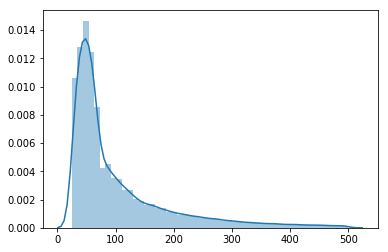

In [9]:
sns.distplot([len(desc) for desc in descs]);

In [10]:
random.sample(descs, 10)

['Override the default one to avoid duplicate dump.',
 'Read information about an image. DCNL Returns an empty dictionary if there is no info, just the field value if DCNL a field is requested, or the entire dictionary otherwise.',
 'Wrapper around the logger',
 'Mark schema modified. Call this first so user can abort if necessary.',
 'Check whether program cards are present.',
 'Instead of the classic form view, redirect to the post on the website directly',
 'The view that returns the map composer opened to DCNL the map with the given official site url.',
 'Calculate the percentage match for two db records DCNL @todo: parameter description? DCNL @status: currently unused',
 'Get the interior overhang support angle in degrees.',
 '@param str p: the stringified packet DCNL @param str pay: the stringified payload DCNL @return str: the stringified packet and payload, with the packet length field "patched" DCNL @raise AssertionError']

## Save

In [11]:
%store descs

Stored 'descs' (list)
